* https://towardsdatascience.com/4x-faster-scikit-learn-in-3-lines-of-code-6b8799876b4a

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
blackhole_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/9899fdda-f611-49ef-beb3-d87c881942a6').sort_index(axis=0)

In [4]:
blackhole_data.tail(5)

u-band_galaxy_magnitude  g-band_galaxy_magnitude  \
9473456                 -14.8458                 -16.1088   
9473457                 -16.7830                 -16.9661   
9473458                 -16.2107                 -16.6839   
9473459                 -16.3265                 -16.7401   
9473460                 -15.1585                 -16.3589   

         r-band_galaxy_magnitude  i-band_galaxy_magnitude  \
9473456                 -16.6980                 -16.9562   
9473457                 -16.7668                 -16.6545   
9473458                 -16.6282                 -16.6087   
9473459                 -16.6748                 -16.6487   
9473460                 -16.7987                 -16.9918   

         z-band_galaxy_magnitude  u-band_bulge_magnitude  \
9473456                 -17.1238                -14.8458   
9473457                 -16.5672                 99.6834   
9473458                 -16.5972                 99.6834   
9473459                 -16.6162                 99.6834   
9473460                 -17.1235                -15.1585   

         g-band_bulge_magnitude  r-band_bulge_magnitude  \
9473456                -16.1088                -16.6980   
9473457                 99.6834                 99.6834   
9473458                 99.6834                 99.6834   
9473459                 99.6834                 99.6834   
9473460                -16.3589                -16.7987   

         i-band_bulge_magnitude  z-band_bulge_magnitude  ...       vx  \
9473456                -16.9562                -17.1238  ... -281.323   
9473457                 99.6834                 99.6834  ...  194.365   
9473458                 99.6834                 99.6834  ... -417.003   
9473459                 99.6834                 99.6834  ... -411.753   
9473460                -16.9918                -17.1235  ...   21.953   

                vy        vz  total_stellar_mass  bulge_stellar_mass  \
9473456   -8.26812  567.5760            0.086228            0.086228   
9473457 -207.79000  340.7130            0.003361            0.000000   
9473458 -131.77500  126.3560            0.006114            0.000000   
9473459  476.23000  -99.0580            0.008143            0.000000   
9473460  218.08300  -51.9275            0.050373            0.050373   

         cold_gas_mass  hot_gas_mass  ejected_gas_mass  black_hole_mass  \
9473456       0.006892      0.000637          0.128942         0.000106   
9473457       0.053625      0.000000          0.039798         0.000000   
9473458       0.057505      0.000000          0.033905         0.000000   
9473459       0.204028      0.000000          0.080170         0.000000   
9473460       0.002318      0.000705          0.142719         0.000013   

         total_star_formation_rate  
9473456                   0.000000  
9473457                   0.249707  
9473458                   0.399230  
9473459                   0.385402  
9473460                   0.000000  

[5 rows x 23 columns]

In [5]:
blackhole_data.isnull().sum()

u-band_galaxy_magnitude      0
g-band_galaxy_magnitude      0
r-band_galaxy_magnitude      0
i-band_galaxy_magnitude      0
z-band_galaxy_magnitude      0
u-band_bulge_magnitude       0
g-band_bulge_magnitude       0
r-band_bulge_magnitude       0
i-band_bulge_magnitude       0
z-band_bulge_magnitude       0
x                            0
y                            0
z                            0
vx                           0
vy                           0
vz                           0
total_stellar_mass           0
bulge_stellar_mass           0
cold_gas_mass                0
hot_gas_mass                 0
ejected_gas_mass             0
black_hole_mass              0
total_star_formation_rate    0
dtype: int64

In [6]:
blackhole_data.shape

(9473461, 23)

In [7]:
blackhole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473461 entries, 0 to 9473460
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   u-band_galaxy_magnitude    float64
 1   g-band_galaxy_magnitude    float64
 2   r-band_galaxy_magnitude    float64
 3   i-band_galaxy_magnitude    float64
 4   z-band_galaxy_magnitude    float64
 5   u-band_bulge_magnitude     float64
 6   g-band_bulge_magnitude     float64
 7   r-band_bulge_magnitude     float64
 8   i-band_bulge_magnitude     float64
 9   z-band_bulge_magnitude     float64
 10  x                          float64
 11  y                          float64
 12  z                          float64
 13  vx                         float64
 14  vy                         float64
 15  vz                         float64
 16  total_stellar_mass         float64
 17  bulge_stellar_mass         float64
 18  cold_gas_mass              float64
 19  hot_gas_mass               float64
 20  ej

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 30)
mpl.rcParams['axes.grid'] = True

In [9]:
corr=blackhole_data.corr()
corr.style.background_gradient(cmap='PuBu')

<AxesSubplot:>

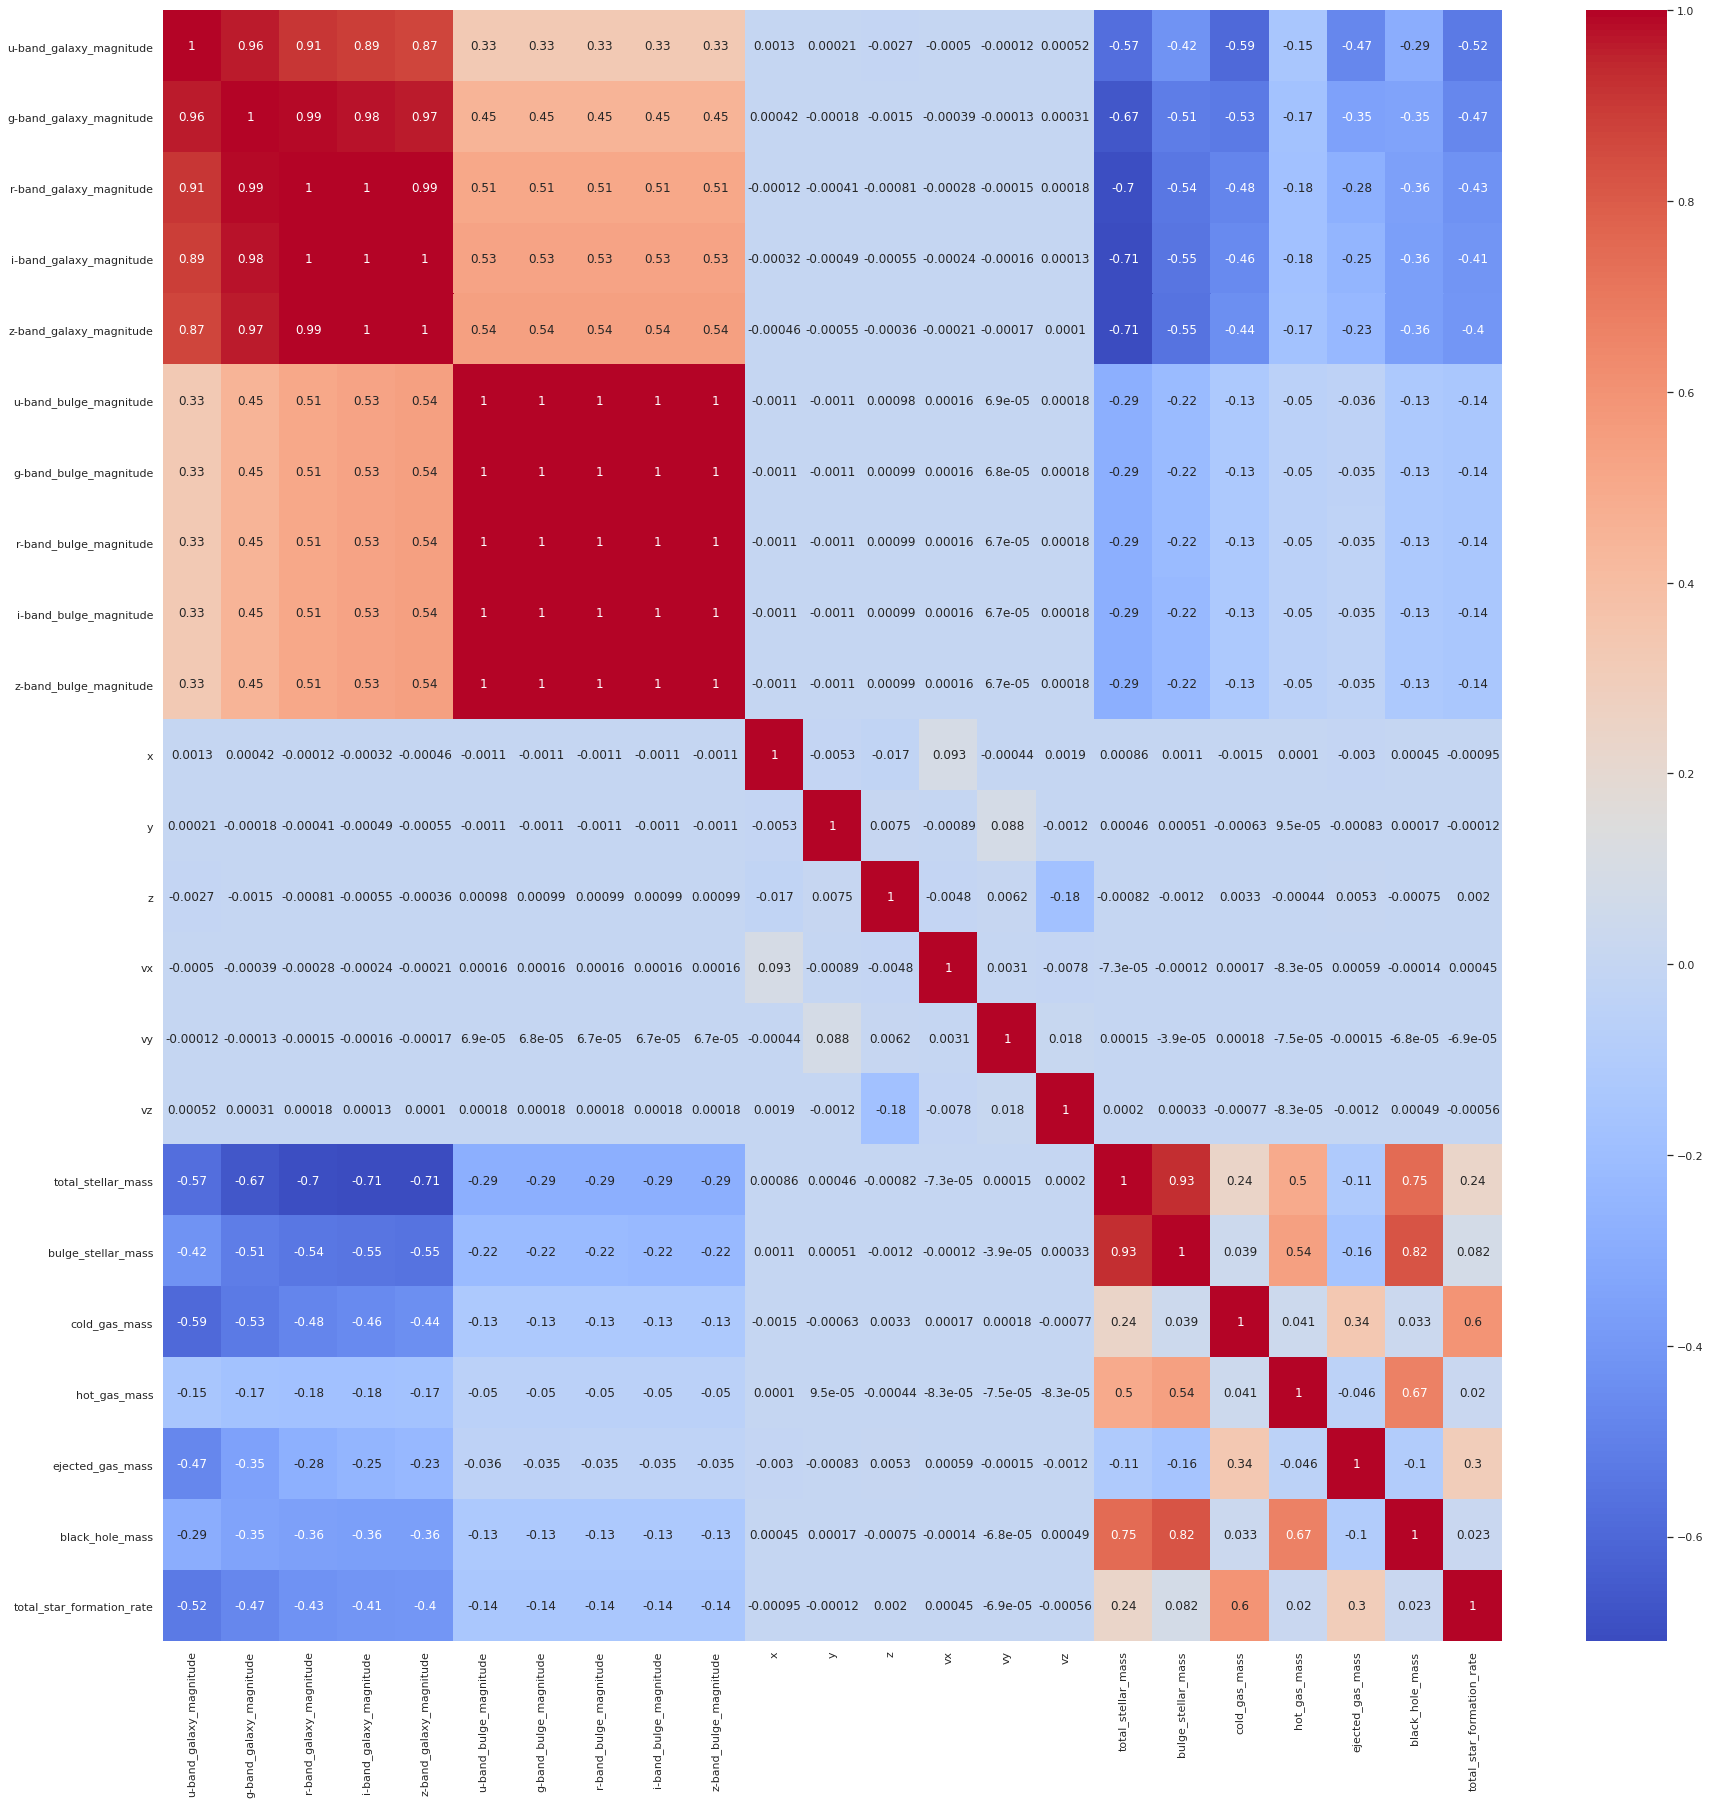

In [10]:
sns.heatmap(blackhole_data.corr(),cmap='coolwarm',annot=True)


In [11]:
blackhole_data.describe()

u-band_galaxy_magnitude  g-band_galaxy_magnitude  \
count             9.473461e+06             9.473461e+06   
mean             -1.634819e+01            -1.762160e+01   
std               1.214633e+00             1.190317e+00   
min              -2.297370e+01            -2.308130e+01   
25%              -1.717050e+01            -1.843250e+01   
50%              -1.616700e+01            -1.736910e+01   
75%              -1.541390e+01            -1.664570e+01   
max              -1.304660e+01            -1.522590e+01   

       r-band_galaxy_magnitude  i-band_galaxy_magnitude  \
count             9.473461e+06             9.473461e+06   
mean             -1.820151e+01            -1.848423e+01   
std               1.222031e+00             1.245271e+00   
min              -2.299930e+01            -2.336700e+01   
25%              -1.902720e+01            -1.932230e+01   
50%              -1.792570e+01            -1.820380e+01   
75%              -1.718080e+01            -1.744830e+01   
max              -1.660000e+01            -1.630470e+01   

       z-band_galaxy_magnitude  u-band_bulge_magnitude  \
count             9.473461e+06            9.473461e+06   
mean             -1.872921e+01            2.203092e+01   
std               1.281317e+00            5.335315e+01   
min              -2.369830e+01           -2.297370e+01   
25%              -1.959090e+01           -1.527810e+01   
50%              -1.844380e+01           -1.339310e+01   
75%              -1.767030e+01            9.968340e+01   
max              -1.605070e+01            9.968340e+01   

       g-band_bulge_magnitude  r-band_bulge_magnitude  i-band_bulge_magnitude  \
count            9.473461e+06            9.473461e+06            9.473461e+06   
mean             2.099560e+01            2.049790e+01            2.027161e+01   
std              5.406640e+01            5.440910e+01            5.456486e+01   
min             -2.307900e+01           -2.299590e+01           -2.336230e+01   
25%             -1.684270e+01           -1.758570e+01           -1.792460e+01   
50%             -1.485930e+01           -1.556970e+01           -1.589670e+01   
75%              9.968340e+01            9.968340e+01            9.968340e+01   
max              9.968340e+01            9.968340e+01            9.968340e+01   

       z-band_bulge_magnitude  ...            vx            vy            vz  \
count            9.473461e+06  ...  9.473461e+06  9.473461e+06  9.473461e+06   
mean             2.009003e+01  ...  2.446068e-01  1.699969e-01 -2.657710e-01   
std              5.469054e+01  ...  3.645128e+02  3.548591e+02  3.714983e+02   
min             -2.369130e+01  ... -4.311200e+03 -4.495630e+03 -4.511380e+03   
25%             -1.820790e+01  ... -2.118680e+02 -2.024610e+02 -2.218020e+02   
50%             -1.614300e+01  ... -1.086690e+00  2.460130e+00 -3.595980e+00   
75%              9.968340e+01  ...  2.135030e+02  2.030780e+02  2.189860e+02   
max              9.968340e+01  ...  5.168250e+03  5.076010e+03  4.876770e+03   

       total_stellar_mass  bulge_stellar_mass  cold_gas_mass  hot_gas_mass  \
count        9.473461e+06        9.473461e+06   9.473461e+06  9.473461e+06   
mean         1.452132e+00        8.233894e-01   1.646152e-01  2.563419e+00   
std          3.199518e+00        2.758619e+00   2.662809e-01  3.905649e+01   
min          1.417800e-03        0.000000e+00   4.210000e-05  0.000000e+00   
25%          1.720150e-01        0.000000e+00   3.268580e-02  0.000000e+00   
50%          3.887570e-01        5.923490e-02   8.183460e-02  0.000000e+00   
75%          1.204920e+00        4.332040e-01   1.832580e-01  1.992370e-02   
max          8.855310e+01        8.848740e+01   4.853570e+01  1.592190e+04   

       ejected_gas_mass  black_hole_mass  total_star_formation_rate  
count      9.473461e+06     9.473461e+06               9.473461e+06  
mean       3.751009e-01     7.331267e-04               4.673728e-01  
std        4.521135e-01     4.307355e-03               1

In [12]:
#import sys
#!{sys.executable} -m pip install sweetviz

#After filling all missing values
#import sweetviz as sv

#my_report = sv.analyze(blackhole_data)
#my_report.show_html('eda_report.html') # Default arguments will generate to e.g. "SWEETVIZ_REPORT.html"

In [21]:
#sns.pairplot(blackhole_data)


Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
sns.jointplot(x='total_stellar_mass', y='black_hole_mass', data=blackhole_data, kind='reg')

In [ ]:
sns.jointplot(x='bulge_stellar_mass', y='black_hole_mass', data=blackhole_data, kind='reg')

In [ ]:
sns.jointplot(x='hot_gas_mass', y='black_hole_mass', data=blackhole_data, kind='reg')

In [ ]:
#sns.jointplot(x='total_stellar_mass', y='bulge_stellar_mass', data=blackhole_data, kind='reg')

In [ ]:
#sns.jointplot(x='total_stellar_mass', y='cold_gas_mass', data=blackhole_data, kind='reg')

In [ ]:
#sns.jointplot(x='total_stellar_mass', y='hot_gas_mass', data=blackhole_data, kind='reg')

In [ ]:
#sns.jointplot(x='total_stellar_mass', y='ejected_gas_mass', data=blackhole_data, kind='reg')